<a href="https://colab.research.google.com/github/HusseinShatnawi/Data-Analysis-Projects/blob/main/Housing%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **In the first part of this project, I am exploring the data nad trying to understand the data behaviour by applying Data Mining methodologies and EDA**

In [ ]:
# import the libraries pandas, numpy, matplotlib, seaborn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading the dataset and store it as a data frame in a varaible called df
df = pd.read_csv('/content/Housing Dataset.csv')

In [ ]:
 # printing the first five line of hte data frame to explore it and have an idea about it
 df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# **Performing the EDA and data mining to find the anomlies as well as the data that need to be cleaned we need to get some statistical information**

In [ ]:
# to find the data type, record counts and null values
# As we can see there are some missing data in total bedroom feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# Ocean feature is an object data type, to print all distinct values I used unique() function
print(df['ocean_proximity'].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [ ]:
# To determine the count of each value of the ocean_proximity attribute I used value_count() function
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
# To check the statistical information of each attribute so that we can understand the data behavior and its anomalies
#I used the describe() function
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# From the above information we can clearly see there are outliers in some attributes that have big differences between the mean and the standard deviation
# WE need to handle this issue

**Utilizing matplotlib package to draw a heatmap for the data, the map type is a cmap jet type that shows the point in color coded style.**

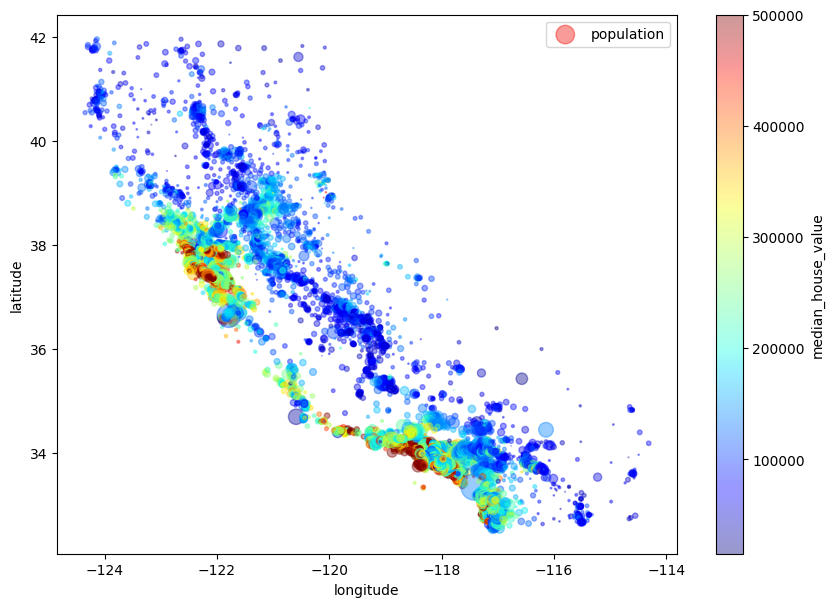

In [ ]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=df["population"]/100, label="population", figsize=(10,7), # I devided the population by 100 to have feasiable points size
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, # using jet type because we want a heat map according to data values
             sharex=False);

In [ ]:
# from the above map we can clearly see the houses near the bay are more expensive than the other houses
# we can note the most expensive houses are either around longitude 118.5 latitude 34 or longitude 122 latitude 37 ( red dots)

**Correlation**

In [ ]:
correlations = df.corr() # creating a correlation matrix using corr() function
correlations

<ipython-input-10-1e9bdb791240>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr() # creating a correlation matrix using corr() function


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [ ]:
# As we are more interested in the house value attribute (I want to build up a predicting model to predict it's value), let's show just present it's correlations in descending sort
correlations['median_house_value'].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

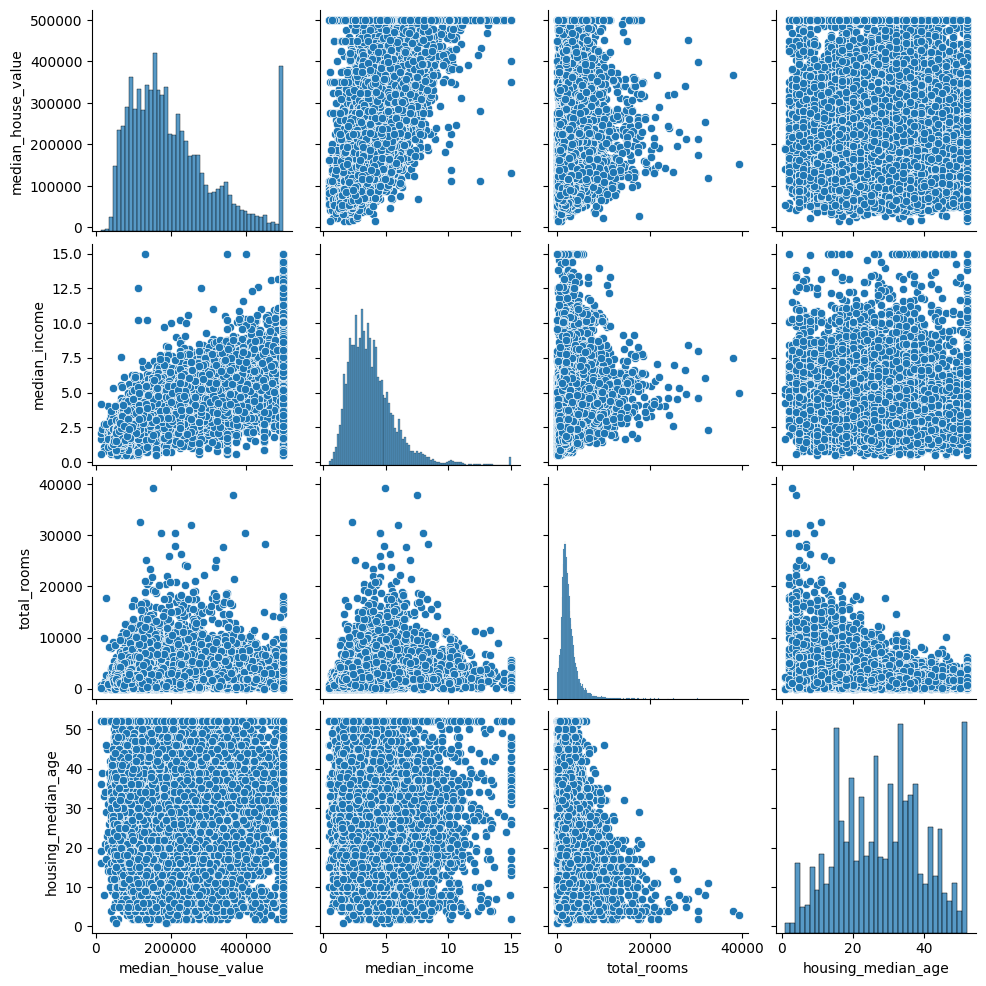

In [ ]:
# Selecting the interesting features and show the realtionships between them and median_house_value particularly bu utilizing the Seaborn library

interesting_attributes= ['median_house_value', 'median_income', 'total_rooms','housing_median_age']
sns.pairplot(df[interesting_attributes]);

In [ ]:
# The above chart show some direct relationships, some attributes have caps that limit the model ability to predict beyond these values, we need to handle this issue

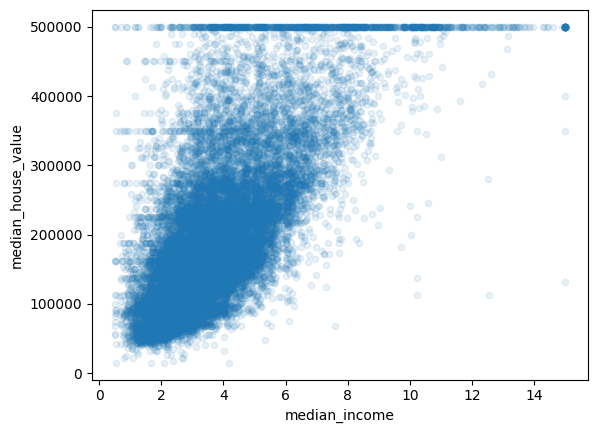

In [ ]:
df.plot(kind= 'scatter', x='median_income', y= 'median_house_value', alpha= 0.1);

# From the below chart we can see the relationship between the these attributes and it's linear realtionship
# There is a cap ( limit) on the medain_house_value attribute which limits and prevents our model to predict beyond this value

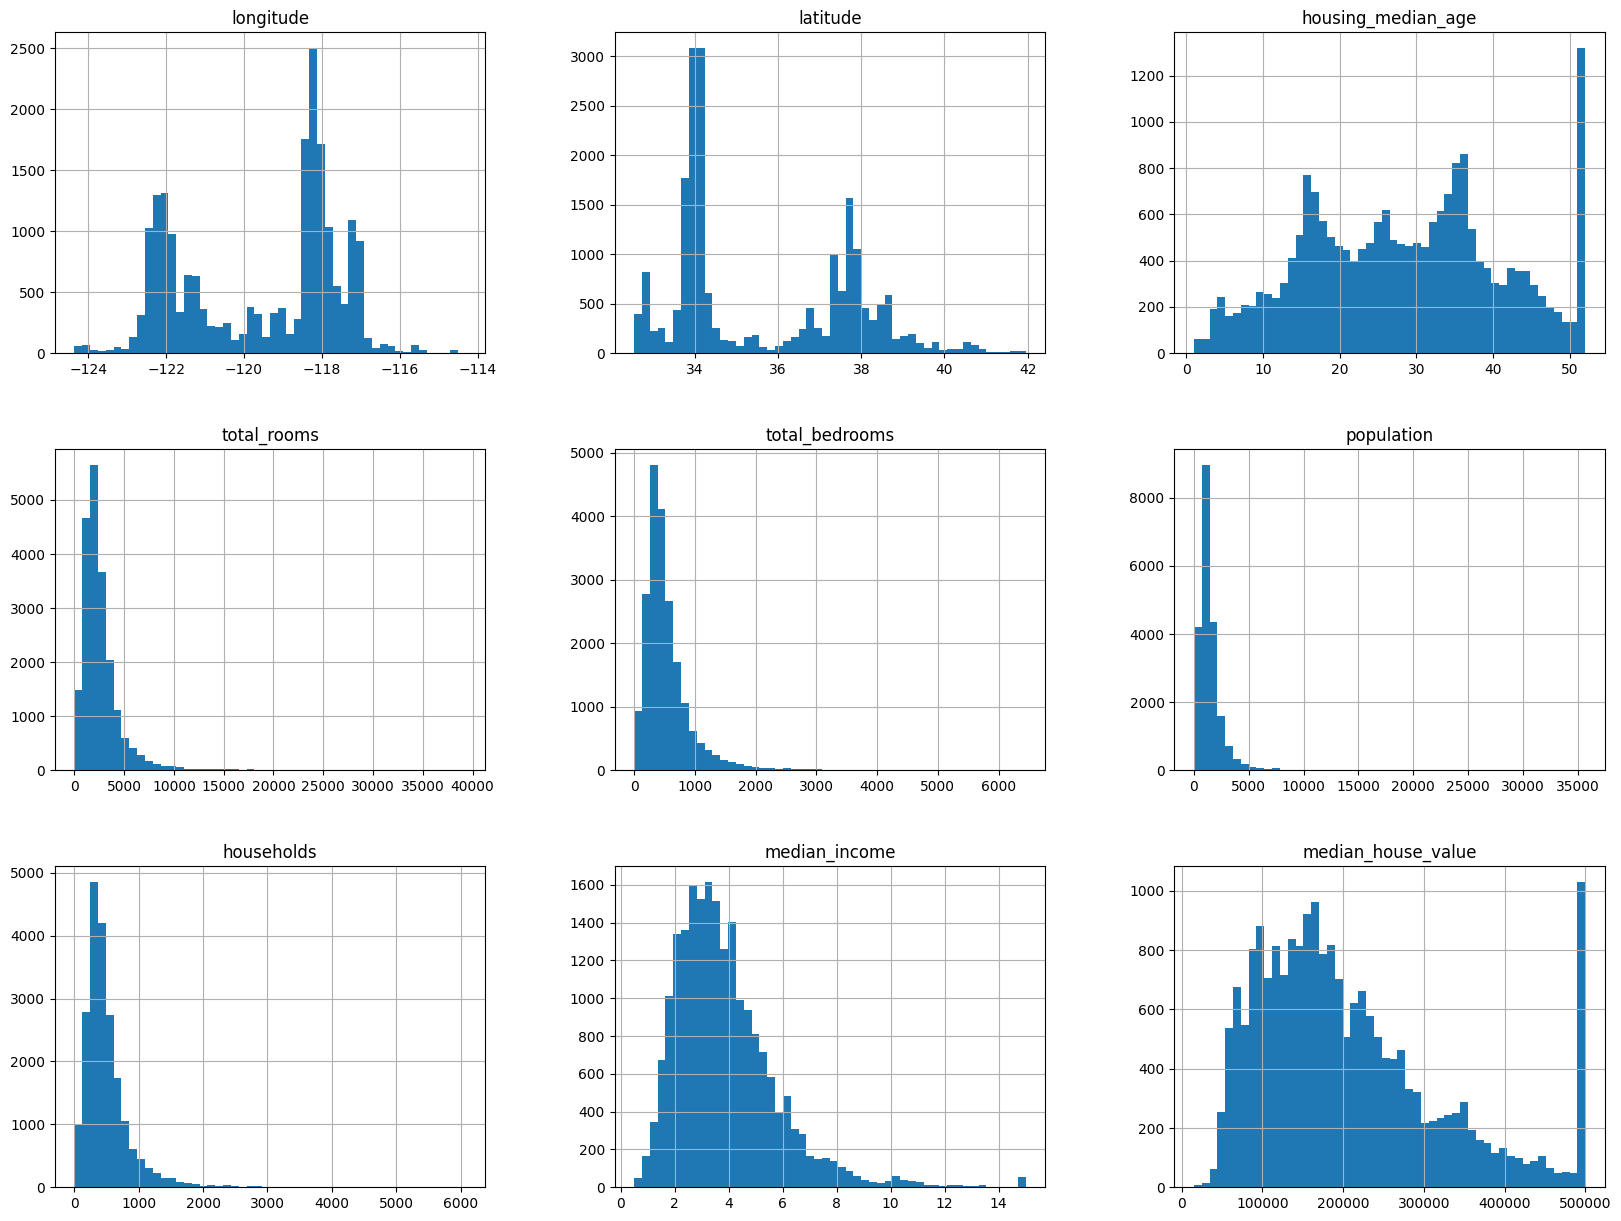

In [ ]:
# To find the data distribution of each attribute so that we can find if there are any skewness, outliers, and caps for the data
df.hist(bins= 50, figsize= (20,15));

Here are a few notes from the above histograms:

In [ ]:
#  1- median income is capped and there are two limitations for the records, and this will create an issue for the model since it will not be able to predict beyond these limits.

# 2- The median house value and median house age attributes are also capped and will create the same issue.

# 3- There are many attributes need to be normalized/ scaled to prevent the model from training on a part of the data more than the other parts. Skewness reduces the model's ability to predict or capture the patterns.

Finding the missing data

In [ ]:
df['total_bedrooms'].isnull().sum()
# To handle the missing values in total bedroom attribute since we have 207 missing records.
# As the number of missing records is few relatively, we can substitute them by the median
# We have other choices to deal with these missing data:
# Dropping the records that include them
# Dropping the whole attribute
# Substitue them by the meean, meadian, mode, constant.

207

In [ ]:
# the manual method:

median= df['total_bedrooms'].median() # finding the median for this attribute
df['total_bedrooms'].fillna(median, inplace= True) # using the fillna() function
df['total_bedrooms'].isnull().sum()


0

Using Simple Imputer method from Sklearn to substitue the missing values by the median ( Just for explaniation but will be done to the dataset later on with the Pipeline).

In [ ]:
# df= df.drop('ocean_proximity', axis=1)  # Dropping the ocean_proximity values since simpleImputer cann't deal with it since it's categorical
# # Using the SimpleImputer from Sklearn
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy= 'median')
# X= imputer.fit_transform(df)
# X
# # the SimpleImputer returns array values so we need to convert it to data frame as below:
# new_dataFrame= pd.DataFrame(df, columns =df.columns, index= df.index )
# new_dataFrame['total_bedrooms'].isnull().sum()

We can enrich the data by performing the feature engineering ( just for explanation but will be done to the dataset within the pipeline below)

In [ ]:
# # Create rooms_per_household feature and add it to our data frame:   ## Down I will automate it so that I commented it here
# df['rooms_per_house']= df['total_bedrooms'] / df['households']


# # Create bedrooms_per_room  feature and add it to our data frame:
# df['bedrooms_per_room']= df['total_bedrooms'] / df['total_rooms']


# # Create population_per_household  feature and add it to our data frame:
# df['population_per_household']= df['population'] / df['households']

**Dealing with skewness by scaling the data: There are two methods: 1- Using cut function 2- Using StratifiedShuffleSplit**

Just for explanation, it will not bedone to the data set here, it will be done within the pipeline below.


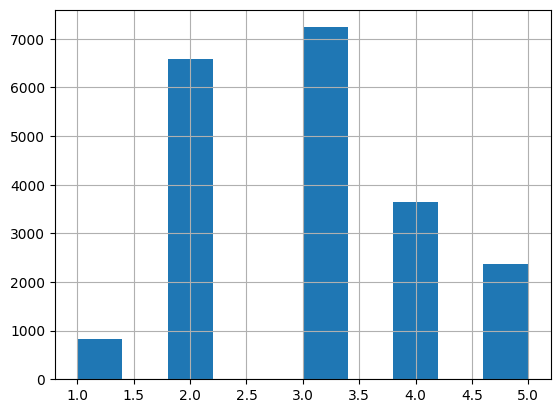

In [ ]:
# Using pd.cut() function
# Scaling the median_income attribute and drawing the results
### From the first histogram we can see most of the data are located between 1 to 6, so I decided to have five bins
df['income_cat']= pd.cut(df['median_income'],   # here I added a new feature to the data frame that we have
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],    # declaring the intervals for the cutting
                               labels=[1, 2, 3, 4, 5])                  # declaring  the labels for each interval
df['income_cat'].hist();                                             # printing the histogram for this attribute

In [ ]:
# Confirming the values' relative frequency for each median_income category

df['income_cat'].value_counts()/len(df['income_cat'])

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

# **Then we need to do StratifiedShuffleSplit to confirm the values will be representing the balanced sets **

 To confirm that the records were shuffled and distributed in such a way that represenetd the balanced distribution (the Shuffling will be done in the pipeline below, here just explaining how we need to deal with such like these cases)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits= 1, test_size= 0.2, random_state= 42)
for train_index, test_index in split.split(df, df['income_cat']):
  strat_train_set= df.loc[train_index]
  strat_test_set= df.loc[test_index]

In [ ]:
# To confirm that the records were shuffled and distributed in such a way that represenetd the balanced distribution we can do the following:

df['income_cat'].value_counts()/len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [ ]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [ ]:
# We can clearly see that the both sets (before and after splitting have the balanced distribution)

I need to remove "income_cat" from the data set since I want to use the pipeline method to do it.


In [ ]:
for set_ in (strat_train_set, strat_test_set):                 # To showcase different procedure to remove an attributes with using loops
    set_.drop("income_cat", axis=1, inplace=True)

In [ ]:
# Since strat_train_set has the scaled data so we will use this data for the explaination

Seperating the data and the lables to explain how we can deal with the categorical data  

In [ ]:
data = strat_train_set.drop("median_house_value", axis=1)
labels = strat_train_set["median_house_value"].copy()

# **Handling the Categorical data 'ocean_proximity' using  OnHotEncoder /  Ordinal Encoder from Sklearn library**

In [ ]:
# We need to convert the categorical data into another type that we can deael with and make our model to be able to handle it

In [ ]:
# There are two main procedures to address such like these cases:
# 1- Ordinal Encoding : When we have a data with ranking or specific ordinal with meaning
# 2- OneHot Encoder: Used when data doesn't have ranking or ordinal

# Ordinal Encoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder       # importing the OrdinalEncoder

ordinal_encoder = OrdinalEncoder()                     # creating a variable to store the instance of OrdinalEncoder class
data_encoded = ordinal_encoder.fit_transform(data[['ocean_proximity']])  # fit and transform the class
data_encoded[:10]                                 # sequared bruckets used because the result is an array NOT column in data frame

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
# to see the categories that for this encoding model:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# OneHot Encoder

In [ ]:
# Used when we don't care about the ranking or ordinal of the data

In [ ]:
from sklearn.preprocessing import OneHotEncoder   # importing OneHotEncoder from Sklearn library

cat_encoder= OneHotEncoder()  # defning the class
data_onehot= cat_encoder.fit_transform(data[['ocean_proximity']])
data_onehot[:10]



<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [ ]:
# As we can see, the OneHotEncoder returns a SPARSE ARRAY.
# We have different methods get results as array, by either:
# convert the sparse array to regular array OR
# Using (sparse = False)

In [ ]:
# Converting the sparse array to regular array:
regular= data_onehot.toarray()
regular

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
# Using sparse= False
cat_encoder= OneHotEncoder(sparse= False)  # defning the class
data_onehot= cat_encoder.fit_transform(data[['ocean_proximity']])
data_onehot[:10]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

## **Pipelines Automation**

In [ ]:
# To automate the previous steps and make them automatically done for any new records, we can do that by
#  Creating Transformation Pipelines that contains Imputer and scaler to balance the data
### By creating such as pipelines we can automate the data preprocessing and ensure the coming data will be ready for machine learning and this will help in maintaining the model accuracy


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [ ]:
df= df.drop('income_cat', axis= 1)  # removing the added column for the balanced data to get back the original data

# Pipelines

In [ ]:
# Pipelines method used to automate the processes, so we can assure that we can apply the code for the new data and we can get the expected results

In [ ]:
# Creating a Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline  # importing the PipeLine package from sklearn
from sklearn.preprocessing import StandardScaler  # importing the StandardScaler package from sklearn since I want to create PipeLine to automate the previous processes:
from sklearn.preprocessing import OneHotEncoder

# Imputing by the median
# Scaling the unbalanced attirbute

# Defining the pipeline name and components
# imputer defined and explained above
auto_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy= 'median')),  # First part of pipeline is imputer for missing values using the medain
    ('scaler', StandardScaler())            # Scaling the data using StandardScaler method

])

In [ ]:
# Tranforming the data using the pipelines created



from sklearn.compose import ColumnTransformer



numerical_data = df.drop('ocean_proximity', axis =1 )   # Garpping the numerical data from original data frame
catergorical_data = df['ocean_proximity']                 # Grapping the categorical data from the original data frame



num_features = list(numerical_data)             # Selcting the numerical features from the data
cat_features = ["ocean_proximity"]                 # selecting the categorical features from the data

# Using the auto pipelines created to transform the data
full_pipeline = ColumnTransformer([
        ("num", auto_pipeline, num_features),
        ("cat", OneHotEncoder(), cat_features),
    ])

data_prepared = full_pipeline.fit_transform(df)

data_prepared.shape  # The result is an array data type not a data frame, so we need to convert it to data frame

(20640, 14)

In [ ]:
# Creating a list for the columns names to use them to convert the arrray into a data frame

categories = df['ocean_proximity'].unique()

columns_list= num_features + list(categories)
len(columns_list)

14

In [ ]:
# Converting the array into data frame


data_prepared = pd.DataFrame(data_prepared,           # the array resulted from the pipeline
                             columns= (columns_list), # list of columns that created from the original data frame and from the categories of of the categorical data
                             index= df.index
                             )
data_prepared.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.0,0.0,0.0,1.0,0.0


### **Separate the labels from the data frame to prepare the data for machine learning model. ** **bold text**

In [ ]:
data= data_prepared.drop('median_house_value', axis= 1)
labels = data_prepared['median_house_value'].copy()

In [ ]:
# Split the data into train set, test set, lables for train set, lables for test set
# Using train_test_split package
from sklearn.model_selection import train_test_split
train_set, test_set, lable_train, lable_test = train_test_split(data, labels, test_size= 0.2, random_state= 42)

# **Linear Regression**

In [ ]:
# Importing the required packages

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()                       # declaring the regression model
lin_reg.fit(train_set, lable_train)               # training the model

LinearRegression()

In [ ]:
model_pred = lin_reg.predict(test_set)              # using the model to predict the lables of the test set to measure the model accuracy

In [ ]:
r2 = r2_score(lable_test, model_pred)               # finding the model's R-squared value

In [ ]:
print("R-squared:", r2)

# The value of R2 is not that good and this means the model fits only 62.5% of the data ( is able to predict only 62.5% of data correctly)

R-squared: 0.6254240620553605


### **Decision Tree**

In [ ]:
# Using decision tree modeling instead of Linear regression

from sklearn.tree import DecisionTreeRegressor     # importing the package
tree_model= DecisionTreeRegressor()                # declaring the model
tree_model.fit(train_set, lable_train)             # training the model

DecisionTreeRegressor()

In [ ]:
tree_pred= tree_model.predict(test_set)              # using the model to predict the lables of the test set
tree_mse= mean_squared_error(lable_test, tree_pred)  # calculating the mean squared error using the model's results and the test lables that we split
tree_rmse = np.sqrt(tree_mse)                        # calculating the model's root mean squared error
tree_rmse

0.597140582652344

**Since the both models are not predicting well, and we don't need to touch the test set to avoid getting the test set exposed by the model and avoid overfitting, it's encouraged to split the dataset into multiple subsets and iteratively training and testing the model on different combinations of these subsets. In this way we can evaluate the model's performance without touching the test set.  **

# Cross-validation set

In [ ]:
from sklearn.model_selection import cross_val_score       # importing the cross-validation package

# Defining the cross-validation parameters such as the number of cross-validation folds, the scoring metric you want to use, the model that you want to use, and labels that we have
scores= cross_val_score(tree_model, train_set, lable_train, scoring= 'neg_mean_squared_error', cv= 5)
tree_rmse_scores= np.sqrt(-scores)         # variable to store the scores of each set of cross-validation
tree_rmse_scores

array([0.60326613, 0.59715181, 0.60765984, 0.58440904, 0.60892641])

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.60326613 0.59715181 0.60765984 0.58440904 0.60892641]
Mean: 0.6002826484495264
Standard deviation: 0.008942173178750469


### **Saving the model **

In [ ]:
import joblib
joblib.dump(tree_model, "my_model.pkl")
#...
my_model_loaded = joblib.load("my_model.pkl")

# ****